In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras 
import os 

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard

from sklearn.metrics import confusion_matrix

from keras.optimizers import rmsprop
from keras.preprocessing.image import ImageDataGenerator 
from keras.preprocessing.image import array_to_img


Using TensorFlow backend.


In [2]:
CAT_NUMBER = 10

In [3]:
(X_train, y_train), (X_test, y_test ) = cifar10.load_data()

In [4]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [5]:
datagen_train = ImageDataGenerator(rotation_range = 90)
datagen_train.fit(X_train)

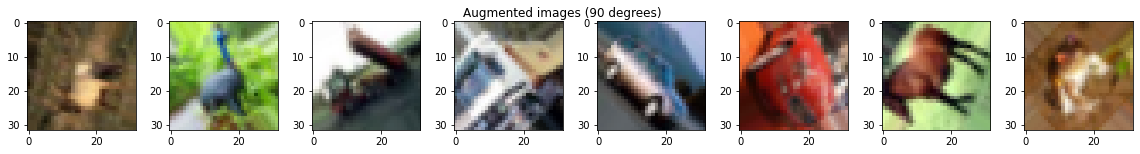

In [6]:
n = 8
fig = plt.figure(figsize = (20, 2))
for x_batch in datagen_train.flow(X_train[:8], batch_size = n):
    for i in range(0, n):
        ax = fig.add_subplot(1, n,i + 1)
        ax.imshow(array_to_img(x_batch[i]))
    
    fig.suptitle('Augmented images (90 degrees)')
    plt.show()
    break

(<matplotlib.image.AxesImage at 0x14e335ef0>,)

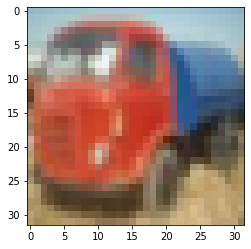

In [7]:
plt.imshow(X_train[102]),

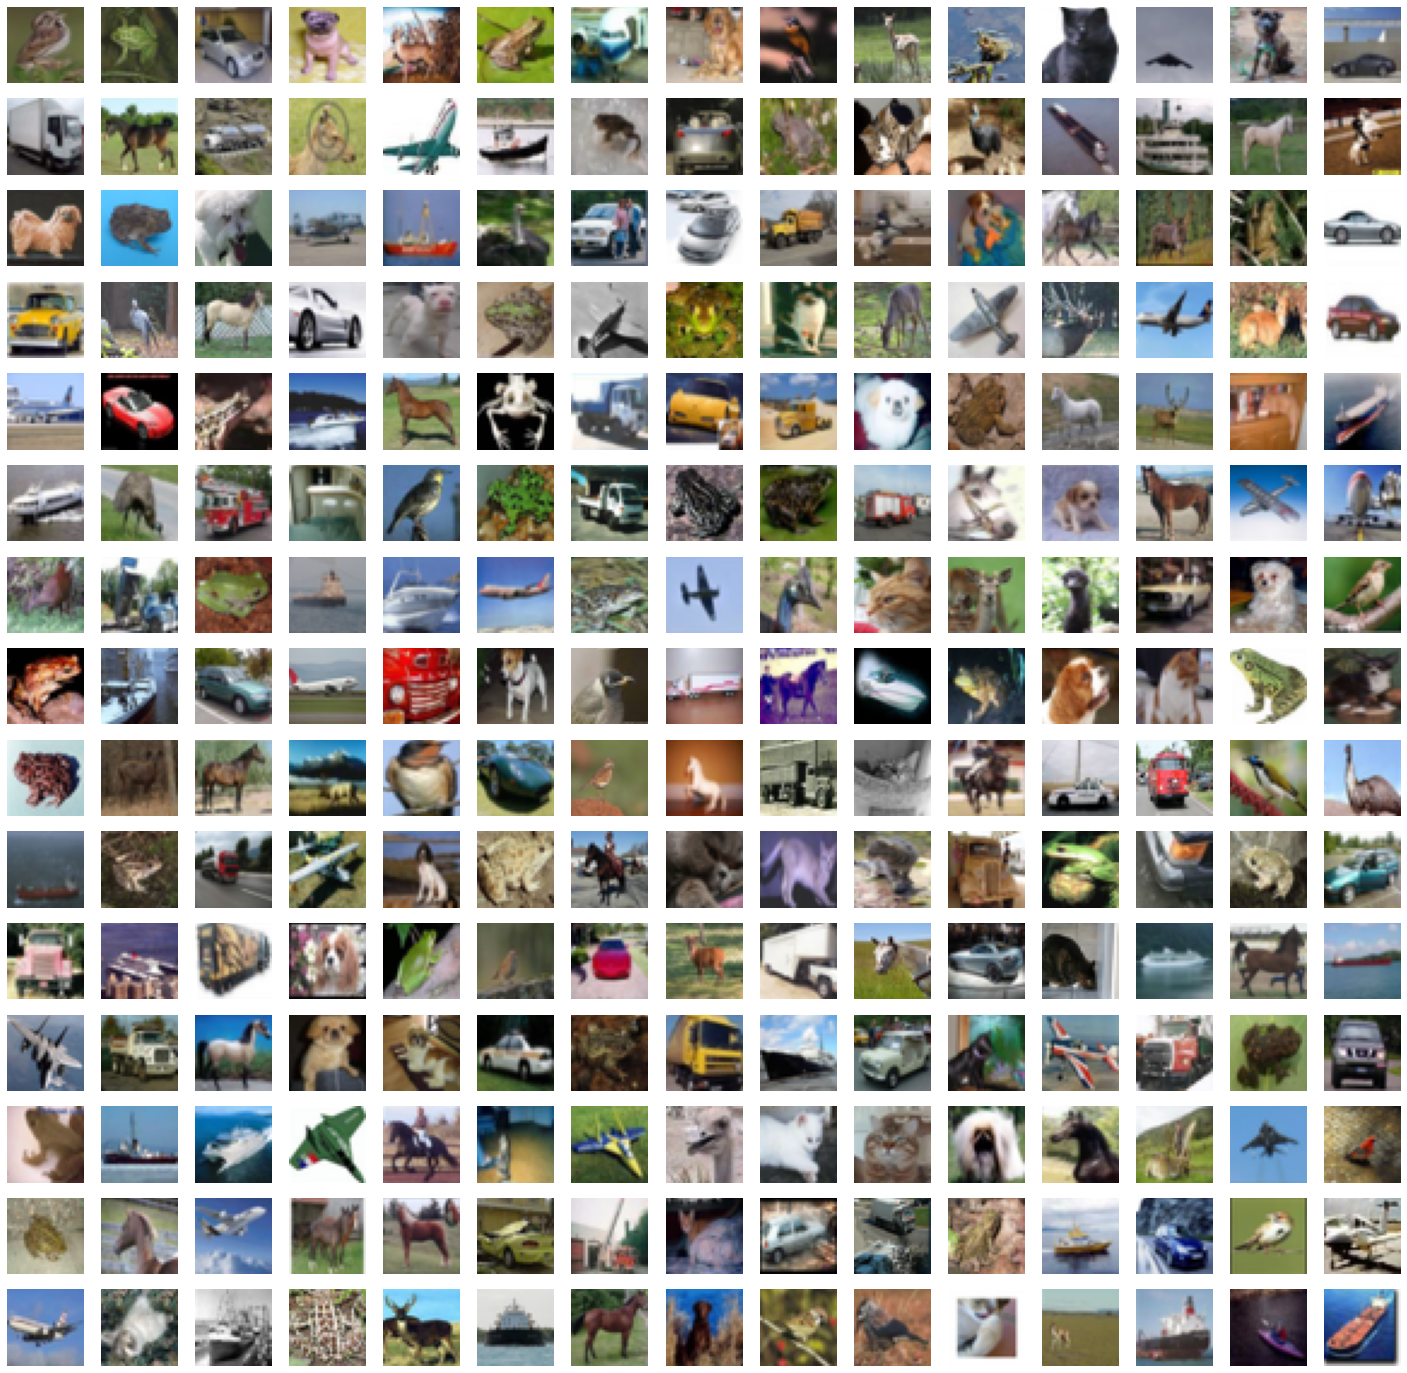

In [8]:
W_grid = 15
L_grid = 15
cols=5
fig,axes = plt.subplots(W_grid, L_grid, figsize = (25,25))
axes = axes.ravel()

for i in np.arange(0, L_grid * W_grid):
    index = np.random.randint(0, len(X_train))
    axes[i].imshow(X_train[index])
    axes[i].axis('off')

In [9]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')


In [10]:
y_train = keras.utils.to_categorical(y_train, CAT_NUMBER)
y_test = keras.utils.to_categorical(y_test, CAT_NUMBER)

In [11]:
X_train = X_train / 255
X_test = X_test / 255

In [12]:
cnn_model = Sequential()

cnn_model.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', input_shape = X_train.shape[1:]))
cnn_model.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.3))

cnn_model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(Dropout(0.2))

cnn_model.add(Flatten())

cnn_model.add(Dense(units = 512, activation = 'relu'))
cnn_model.add(Dense(units = 512, activation = 'relu'))

cnn_model.add(Dense(units = 10, activation = 'softmax'))


In [13]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 64)        36928     
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 10, 64)        0

In [14]:
cnn_model.compile(loss = 'categorical_crossentropy', optimizer = Adam(lr=0.001), metrics = ['accuracy'])

In [ ]:
history = cnn_model.fit(X_train, y_train, batch_size = 32, epochs = 2, shuffle = True)

Epoch 1/2
1239/1563 [======================>.......] - ETA: 1:23 - loss: 1.5229 - accuracy: 0.4398

In [ ]:
evaluation = cnn_model.evaluate(X_test, y_test)

In [ ]:
predict_classes = cnn_model.predict_classes(X_test)
predict_classes

In [ ]:
W_grid = 7
L_grid = 7
fig,axes = plt.subplots(W_grid, L_grid, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, L_grid * W_grid):
    axes[i].imshow(X_test[i])
    axes[i].set_title(f'Prediction = {predict_classes[i]}\n, True = {y_test[i]}')
    axes[i].axis('off')
    
plt.subplots_adjust(wspace = 1)

In [ ]:
cm = confusion_matrix(y_test, predict_classes)
plt.figure(figsize = (10, 10))
sns.heatmap(cm, annot = True)

In [ ]:
directory = os.path.join(os.getcwd(), 'saved_model')
if not os.path.isdir(directory):
    os.makedirs(directory)

model_path = os.path.join(directory, 'keras_cifar10_trained_model.h5')
cnn_model.save(model_path)